# IMPORTING REQUIRED PACKAGES AND MODULES

In [1]:
# Importing essential packages and modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import datasets, model_selection
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN, RandomOverSampler
import warnings
import math
warnings.simplefilter('ignore')

# DATA CLEANING AND PREPROCESSING

In [2]:
#Loading dataset using pandas
attrition_data = pd.read_csv('IBMHR_Dataset.csv', index_col=False,)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Print shape of the dataset
attrition_data.shape

(1470, 35)

In [5]:
#looking at summary using describe
attrition_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
attrition_data['Attrition'] = attrition_data['Attrition'].map({'Yes': 1, 'No': 0})

In [7]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
# Frequency table
attrition_counts = attrition_data['Attrition'].value_counts()
print(attrition_counts)

Attrition
0    1233
1     237
Name: count, dtype: int64


In [9]:
# Calculate the imbalance ratio
imbalance_ratio = attrition_counts[1] / attrition_counts[0]
print(f'Imbalance Ratio: {imbalance_ratio:.2f}')

Imbalance Ratio: 0.19


# VISUALIZATION: HISTOGRAM FOR NUMERICAL FEATURES

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


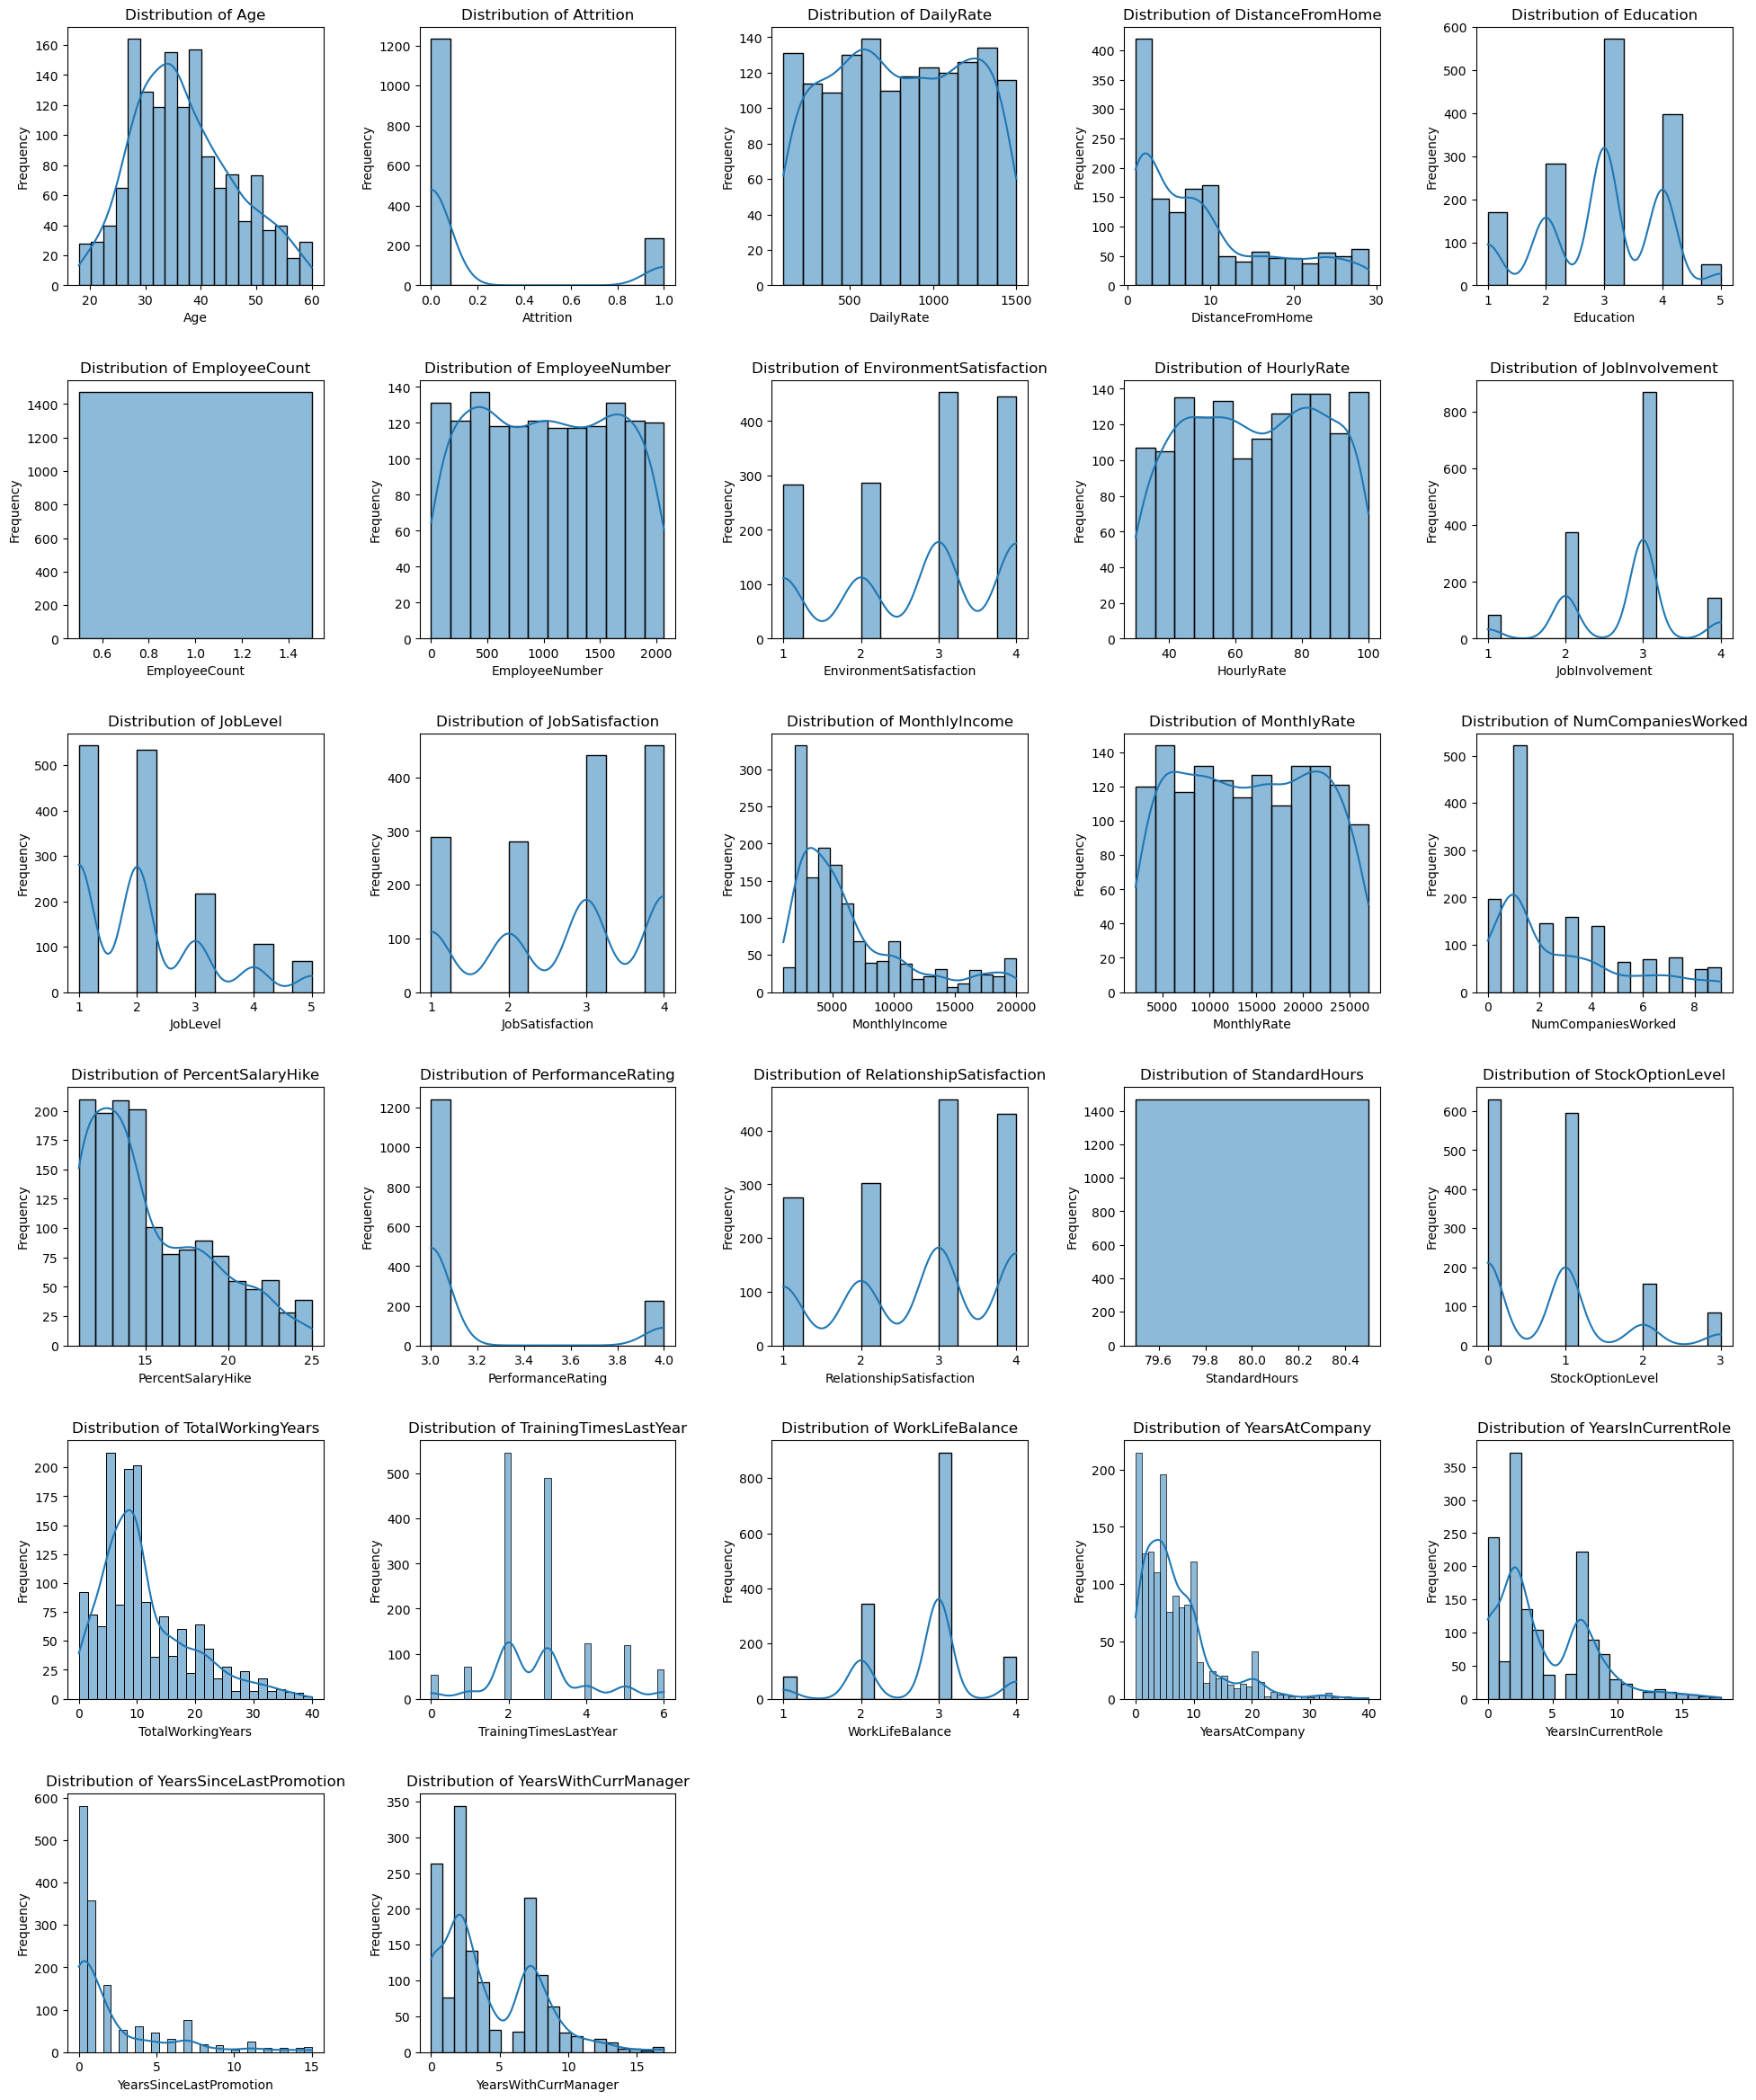

In [10]:
# Histograms for numerical features
numerical_features = attrition_data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)
num_numerical_features = len(numerical_features)
num_rows = math.ceil(num_numerical_features / 5)  # Adjusting number of columns to 5 for better spacing

plt.figure(figsize=(20, num_rows * 4))
for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, 5, i+1)
    sns.histplot(attrition_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout(pad=3.0)
plt.show()

# VISUALIZATION: COUNT PLOTS FOR CATEGORICAL VARIABLES

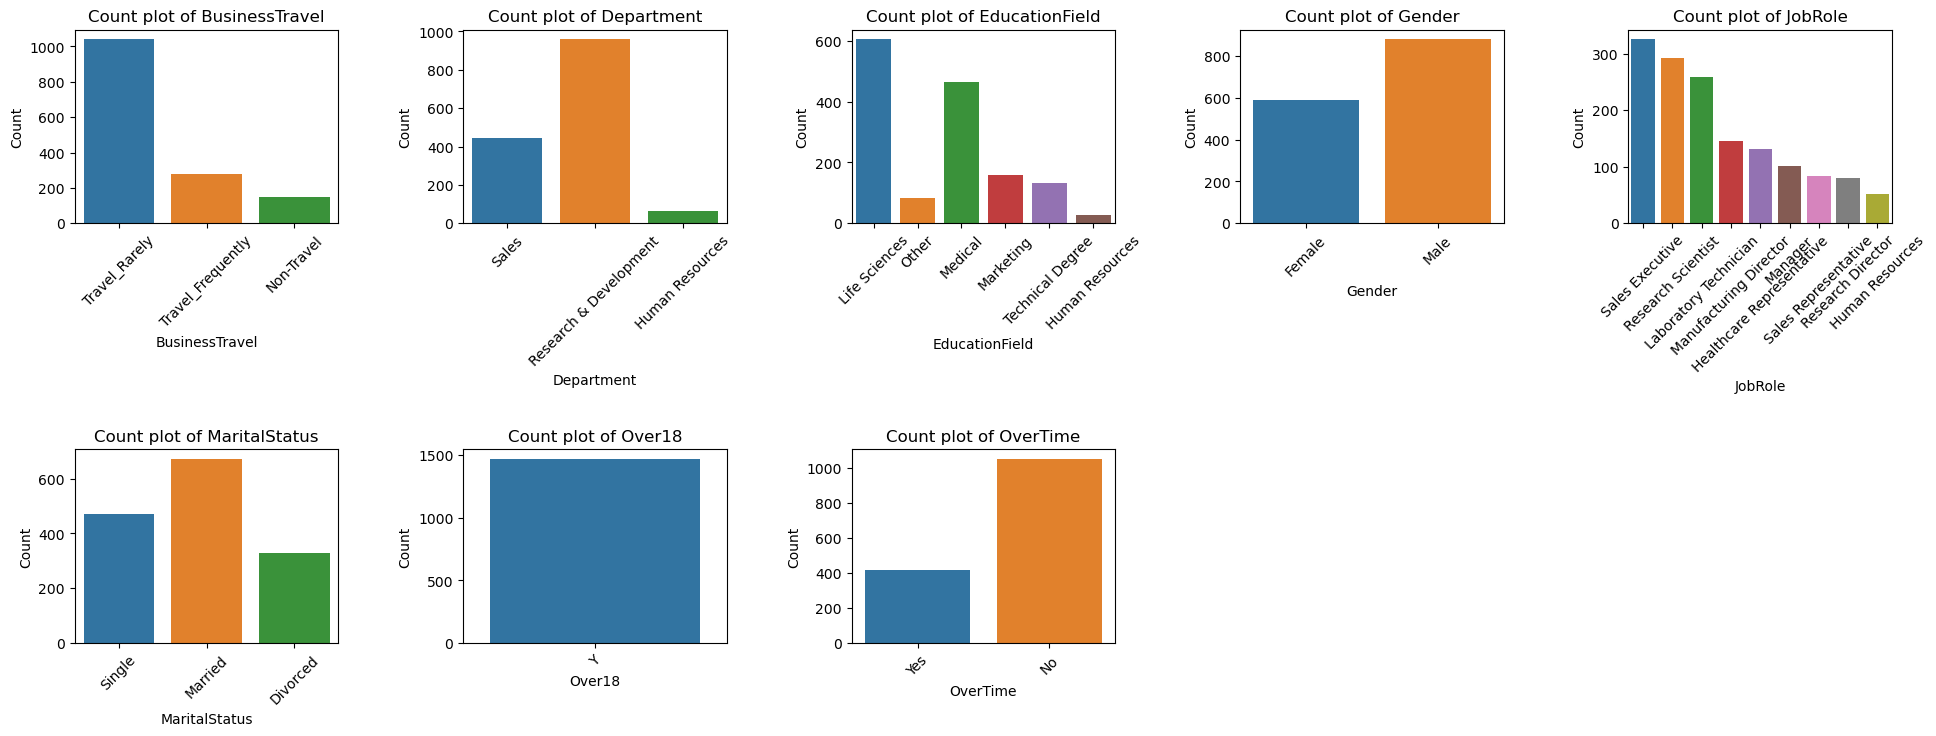

In [11]:
# Count plots for categorical variables
categorical_features = attrition_data.select_dtypes(include=['object', 'category']).columns
num_categorical_features = len(categorical_features)
num_rows = math.ceil(num_categorical_features / 5)  # Adjusting number of columns to 5 for better spacing

plt.figure(figsize=(20, num_rows * 4))
for i, feature in enumerate(categorical_features):
    plt.subplot(num_rows, 5, i+1)
    sns.countplot(x=attrition_data[feature])
    plt.title(f'Count plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)
plt.show()

# VISUALIZATION: CORRELATION MATRIX FOR RELATIONSHIP BETWEEN DIFFERENT FEATURES

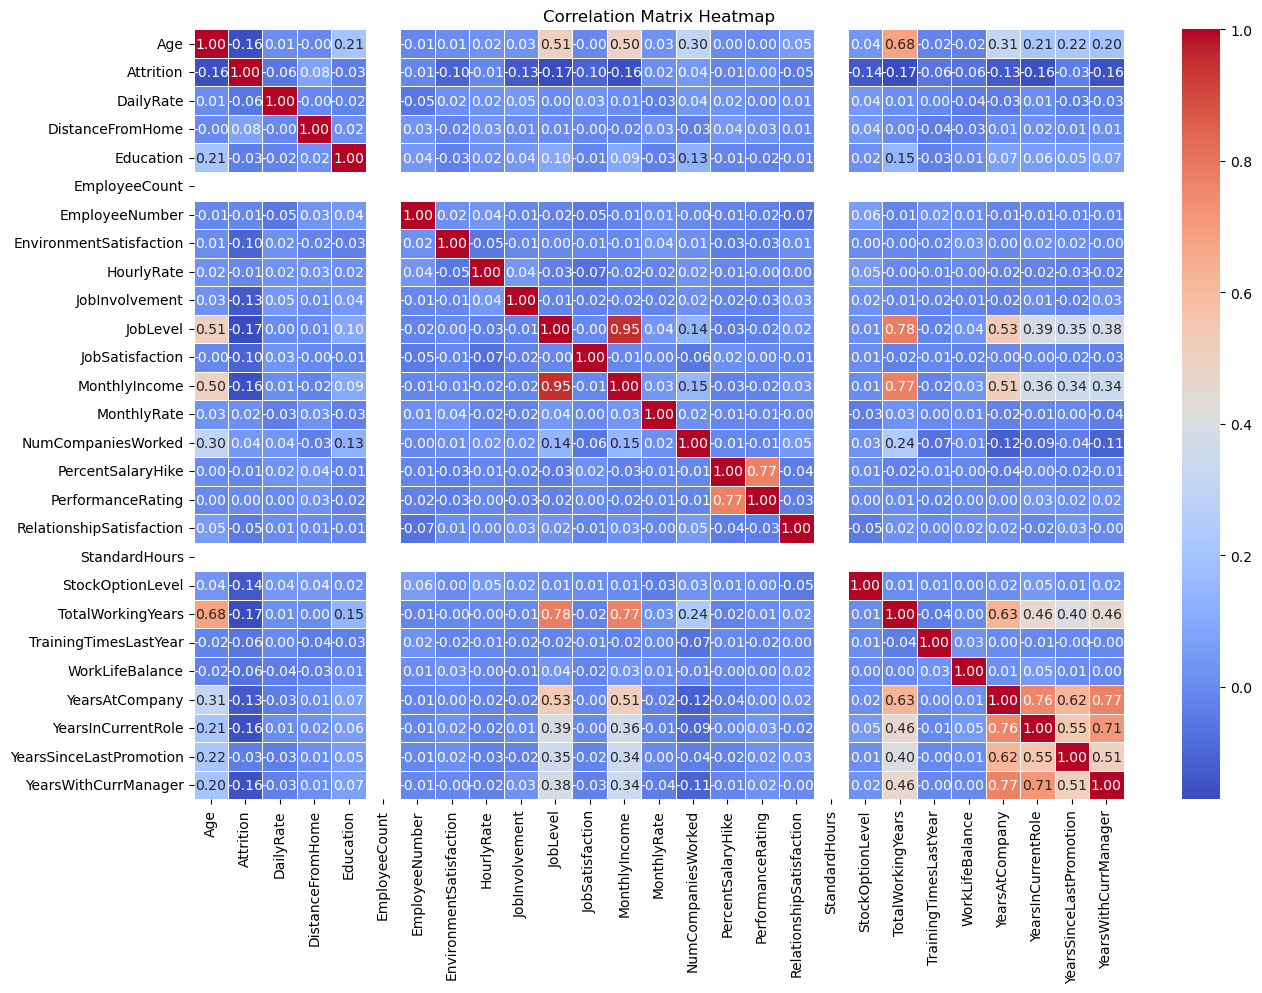

In [12]:
# Correlation matrix for the relationship between different features
# Selecting only numeric columns for correlation matrix
numeric_columns = attrition_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = attrition_data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# KPI CALCULATION

In [13]:
# Calculate and add KPI columns
attrition_data['ESI'] = (attrition_data['EnvironmentSatisfaction'] + attrition_data['JobSatisfaction'] +
                         attrition_data['RelationshipSatisfaction'] + attrition_data['WorkLifeBalance']) / 4

attrition_data['EPS'] = (attrition_data['PerformanceRating'] + attrition_data['JobInvolvement']) / 2

attrition_data['CE'] = (attrition_data['MonthlyIncome'] + attrition_data['PercentSalaryHike']) / (
        attrition_data['JobLevel'] * attrition_data['JobSatisfaction'])

attrition_data['TSI'] = (attrition_data['YearsAtCompany'] + attrition_data['YearsInCurrentRole'] +
                         attrition_data['YearsSinceLastPromotion'] + attrition_data['YearsWithCurrManager']) / 4

# Convert 'OverTime' to numeric by mapping 'Yes' to 1 and 'No' to 0
attrition_data['OverTime'] = attrition_data['OverTime'].map({'Yes': 1, 'No': 0})
attrition_data['WBI'] = attrition_data['WorkLifeBalance'] / (attrition_data['OverTime'] + 1)

# Convert 'BusinessTravel' to numeric by mapping categories to integers
business_travel_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
attrition_data['BusinessTravel'] = attrition_data['BusinessTravel'].map(business_travel_map)
attrition_data['TIS'] = attrition_data['JobSatisfaction'] / (
        attrition_data['BusinessTravel'] * attrition_data['DistanceFromHome'])

# Display the first few rows to verify changes
#Verifying the information
print(attrition_data.head())

# Save the KPI added original dataset
attrition_data.to_csv('OrginaldatasetwithKPI.csv', index=False)
print("Orginal dataset with KPI saved successfully as 'OrginalDatawithKPI.csv'.")


   Age  Attrition  BusinessTravel  DailyRate              Department  \
0   41          1               1       1102                   Sales   
1   49          0               2        279  Research & Development   
2   37          1               1       1373  Research & Development   
3   33          0               2       1392  Research & Development   
4   27          0               1        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0  ...          

# NORMALIZATION USING Z-SCORE AND MIN_MAX SCALE AND ONE HOT ENCODING FOR CATEGORICAL FEATURES

In [14]:
# Drop the specified columns
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18', 'MonthlyRate', 'DailyRate']
attrition_data.drop(columns=columns_to_drop, inplace=True)

# List of columns for different preprocessing steps
continuous_features = ['DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'NumCompaniesWorked', 'Age']
ordinal_features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                    'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', 'StockOptionLevel']
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Standardize continuous numerical features using Z-score normalization
standard_scaler = StandardScaler()

# Normalize ordinal numerical features using Min-Max scaling
min_max_scaler = MinMaxScaler()

# One-Hot Encoding for categorical features
one_hot_encoder = OneHotEncoder()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_standard', standard_scaler, continuous_features),
        ('num_minmax', min_max_scaler, ordinal_features),
        ('cat', one_hot_encoder, categorical_features)
    ])

# Apply the transformations and update the dataset
attrition_data_processed = preprocessor.fit_transform(attrition_data)

# Convert the processed data back to a DataFrame
processed_columns = (continuous_features + ordinal_features +
                     list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))
attrition_data_processed_df = pd.DataFrame(attrition_data_processed, columns=processed_columns)

# Adding the KPIs and Attrition column back to the processed DataFrame
kpi_columns = ['ESI', 'EPS', 'CE', 'TSI', 'WBI', 'TIS']
attrition_data_processed_df[kpi_columns] = attrition_data[kpi_columns]
attrition_data_processed_df['Attrition'] = attrition_data['Attrition'].values

print("Processed dataframe with KPIs successfully done")

Processed dataframe with KPIs successfully done


# BALANCING THE MINORITY CLASS

In [15]:
# Check for infinite values and replace them
attrition_data_processed_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for any NaN values in the dataset
if attrition_data_processed_df.isna().any().any():
    # Option 1: Fill NaN values with the mean (or median, mode, etc.)
    attrition_data_processed_df.fillna(attrition_data_processed_df.mean(), inplace=True)
    # Option 2: Drop rows with NaN values (use with caution, as this can reduce your data size)
    # df.dropna(inplace=True)
        
# Define features and target variable
X = attrition_data_processed_df.drop('Attrition', axis=1)
y = attrition_data_processed_df['Attrition']

# Apply ADASYN to the entire dataset
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Combine the resampled data into a new DataFrame
resampled_columns = X.columns  # Use the column names from the original features
resampled_df = pd.DataFrame(X_resampled, columns=resampled_columns)
resampled_df['Attrition'] = y_resampled

# Check the class distribution after resampling
print("Class distribution after resampling:", y_resampled.value_counts())

print("Resampled data saved successfully as 'Resampled_Attrition_Data_with_KPIs_and_ADASYN.csv'.")

Class distribution after resampling: Attrition
0    1233
1    1232
Name: count, dtype: int64
Resampled data saved successfully as 'Resampled_Attrition_Data_with_KPIs_and_ADASYN.csv'.


# DATA AUGMENTATION : MAKING DATASET WITH 4500 ROWS

In [16]:
# Desired total number of rows
desired_total_rows = 4500

# Calculate current number of rows
current_total_rows = len(y_resampled)

# Calculate the number of additional rows needed
additional_rows_needed = desired_total_rows - current_total_rows

# RandomOverSampler to adjust the dataset to exactly 4500 rows
if additional_rows_needed > 0:
    # Calculate how many samples are needed to reach the desired count
    strategy = {label: count + additional_rows_needed // 2 for label, count in y_resampled.value_counts().items()}
    ros = RandomOverSampler(sampling_strategy=strategy, random_state=42)
    X_resampled_final, y_resampled_final = ros.fit_resample(X_resampled, y_resampled)
else:
    X_resampled_final, y_resampled_final = X_resampled, y_resampled

# Combine the resampled data into a new DataFrame
resampled_columns = X.columns  # Use the column names from the original features
resampled_increased_df = pd.DataFrame(X_resampled_final, columns=resampled_columns)
resampled_increased_df['Attrition'] = y_resampled_final

# Save the resampled dataset
resampled_increased_df.to_csv('Augmented_Attrition_Data_4500_Rows.csv', index=False)
print("Resampled data with 4500 rows saved successfully as 'Augmented_Attrition_Data_4500_Rows.csv'.")

# Print the new class distribution and total rows to confirm
print("Class distribution after final resampling:", y_resampled_final.value_counts())
print("Total rows after final resampling:", len(y_resampled_final))

Resampled data with 4500 rows saved successfully as 'Augmented_Attrition_Data_4500_Rows.csv'.
Class distribution after final resampling: Attrition
0    2250
1    2249
Name: count, dtype: int64
Total rows after final resampling: 4499


# DETECTING OUTLIERS USING ISOLATION FOREST

In [17]:
from sklearn.ensemble import IsolationForest

# Detect outliers using IsolationForest
isolation_forest = IsolationForest(contamination='auto', random_state=42)
numerical_columns = resampled_increased_df.select_dtypes(include=['float64', 'int64']).columns

# Fit the model
isolation_forest.fit(resampled_increased_df[numerical_columns])

# Predict outliers
outliers_pred = isolation_forest.predict(resampled_increased_df[numerical_columns])

# Add the outliers prediction to the dataset
resampled_increased_df['Outlier'] = outliers_pred

# Filter out the detected outliers
isolation_forest_outliers = resampled_increased_df[resampled_increased_df['Outlier'] == -1]

# Count the number of outliers detected by IsolationForest
num_isolation_forest_outliers = isolation_forest_outliers.shape[0]

# Display the first few rows of the detected outliers for confirmation
isolation_forest_outliers.head()
print("Number of outliers: ",num_isolation_forest_outliers)

Number of outliers:  778


# VISUALIZATION: BOX PLOT FOR OUTLIERS

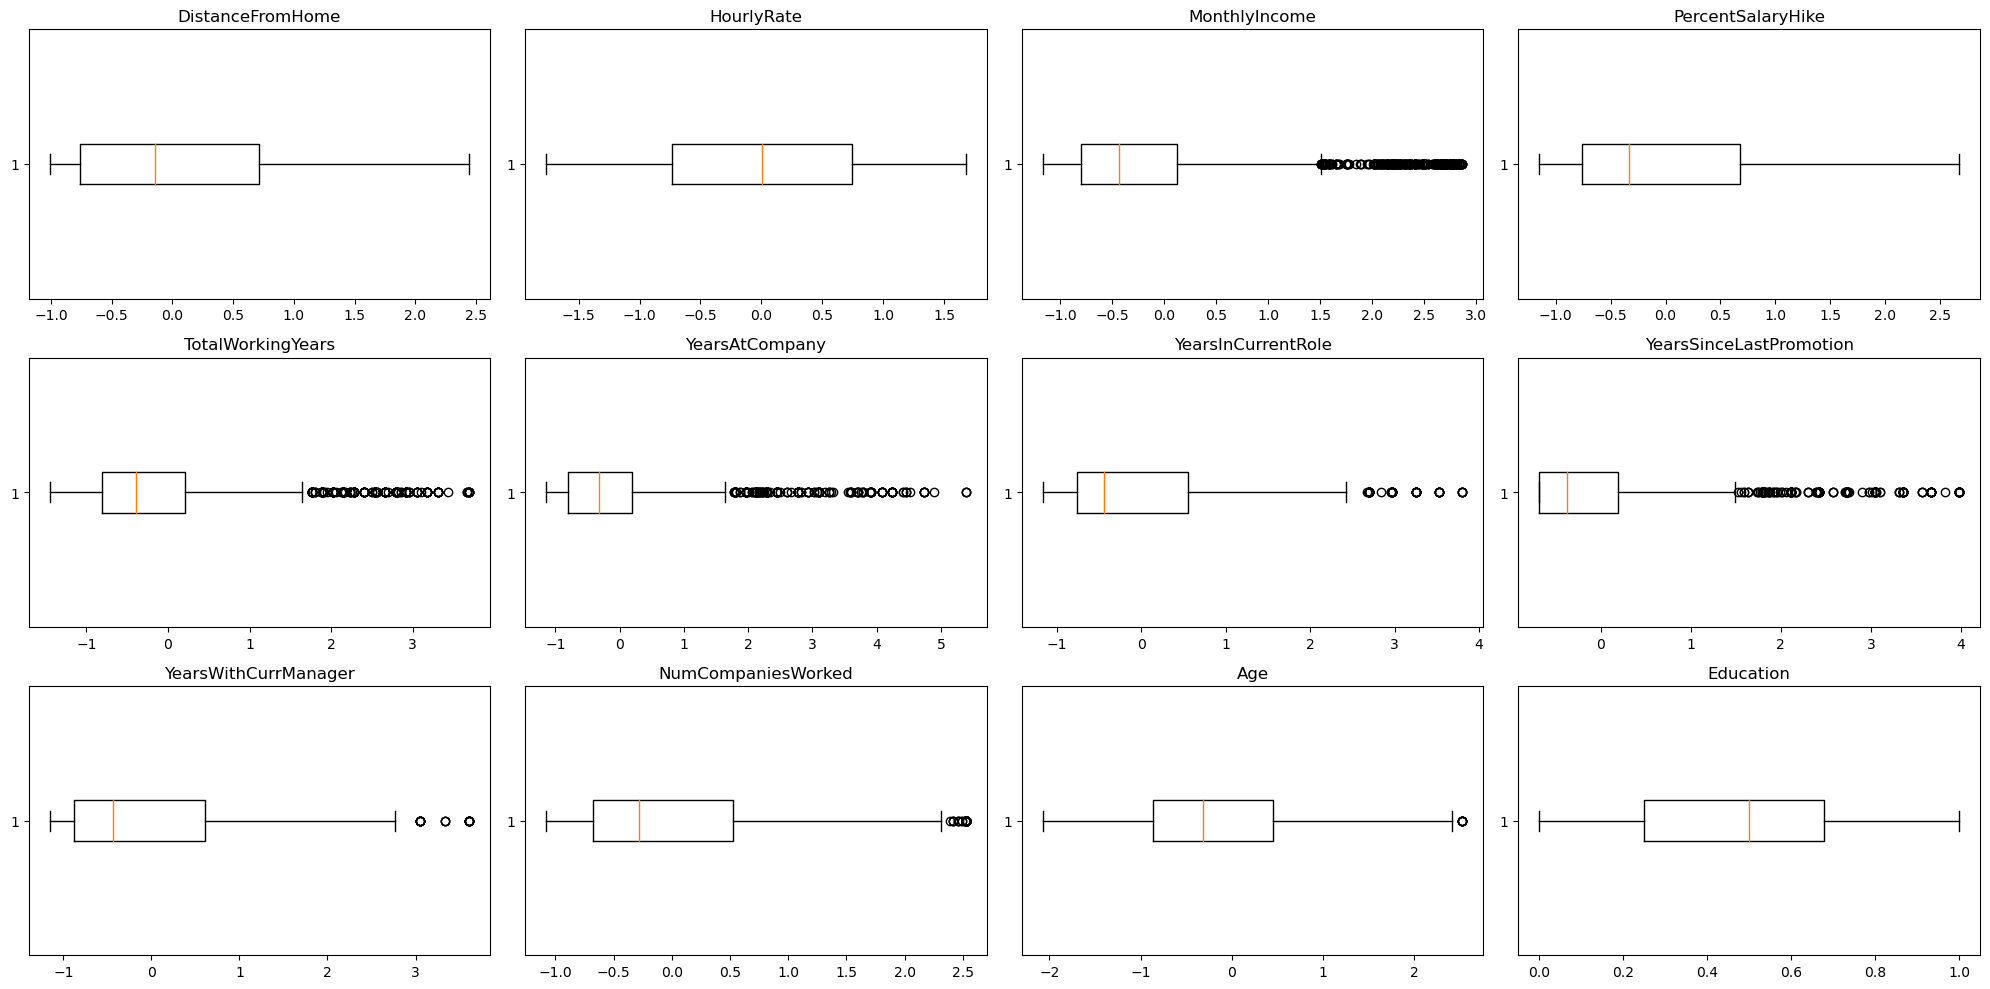

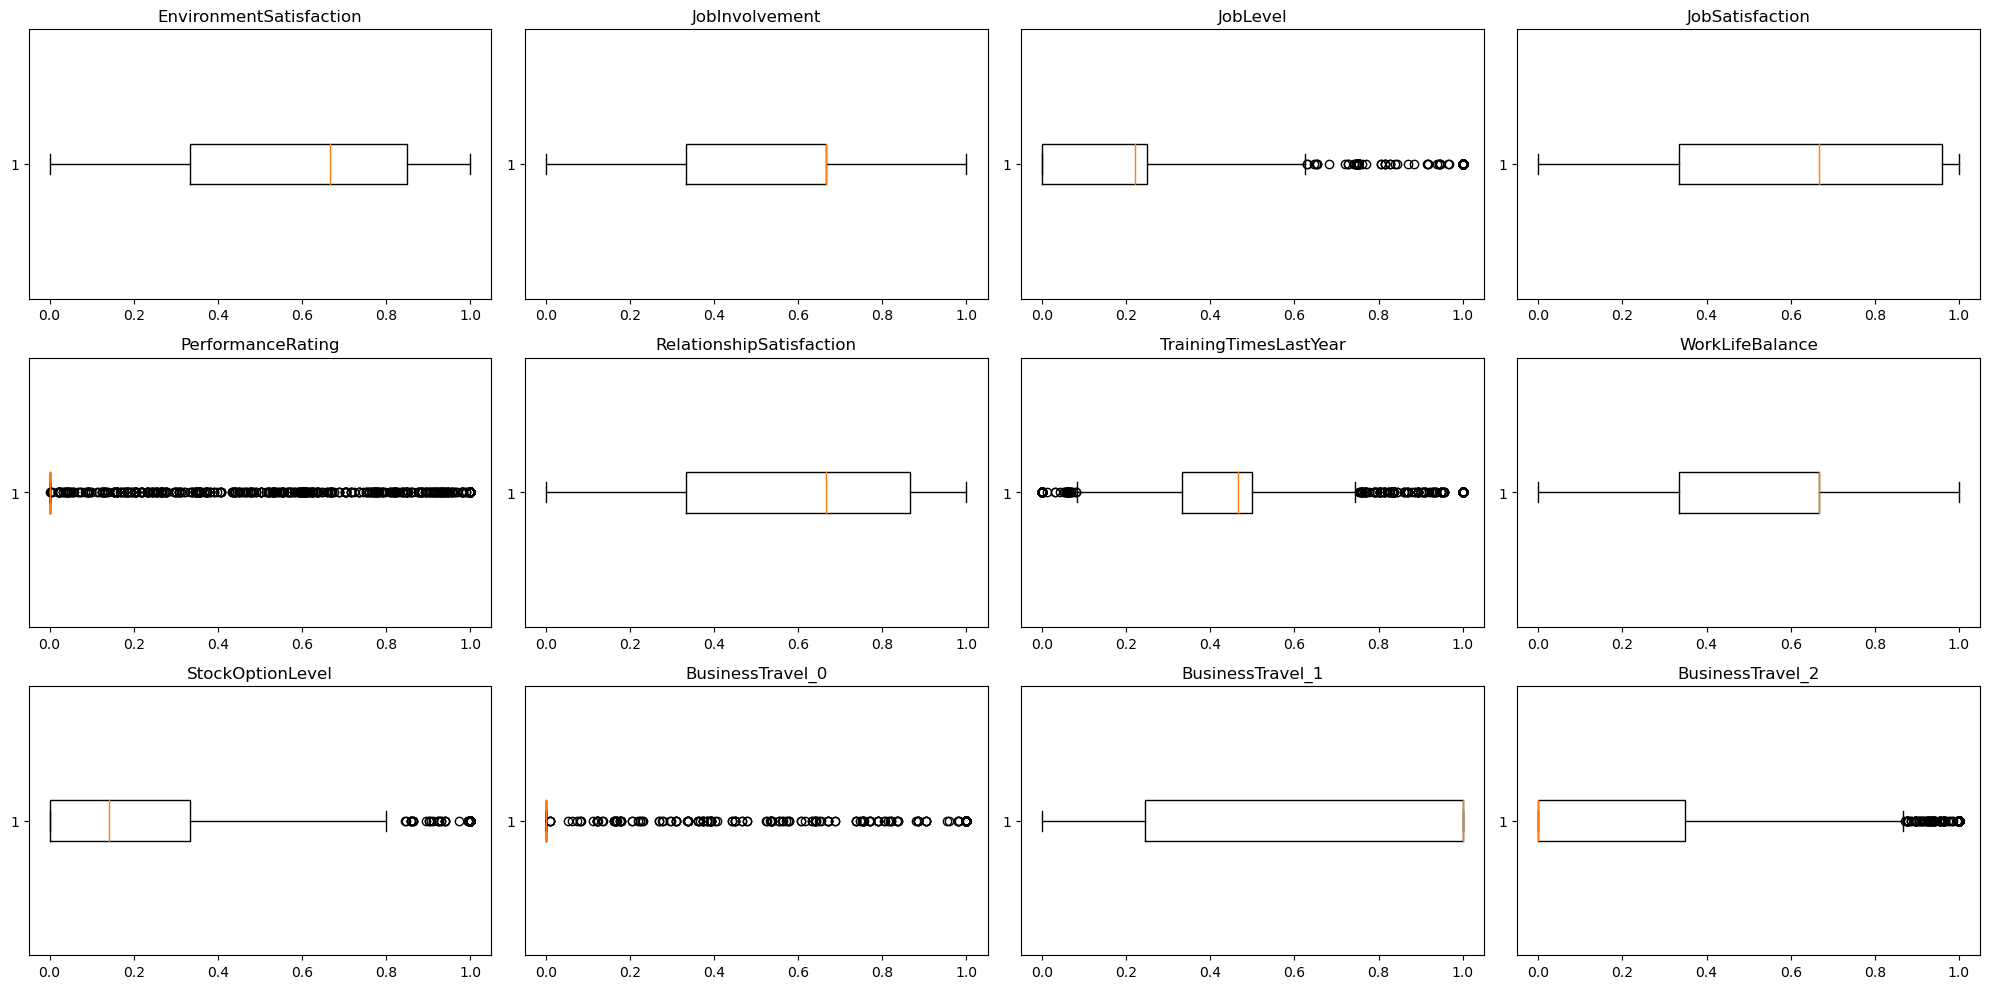

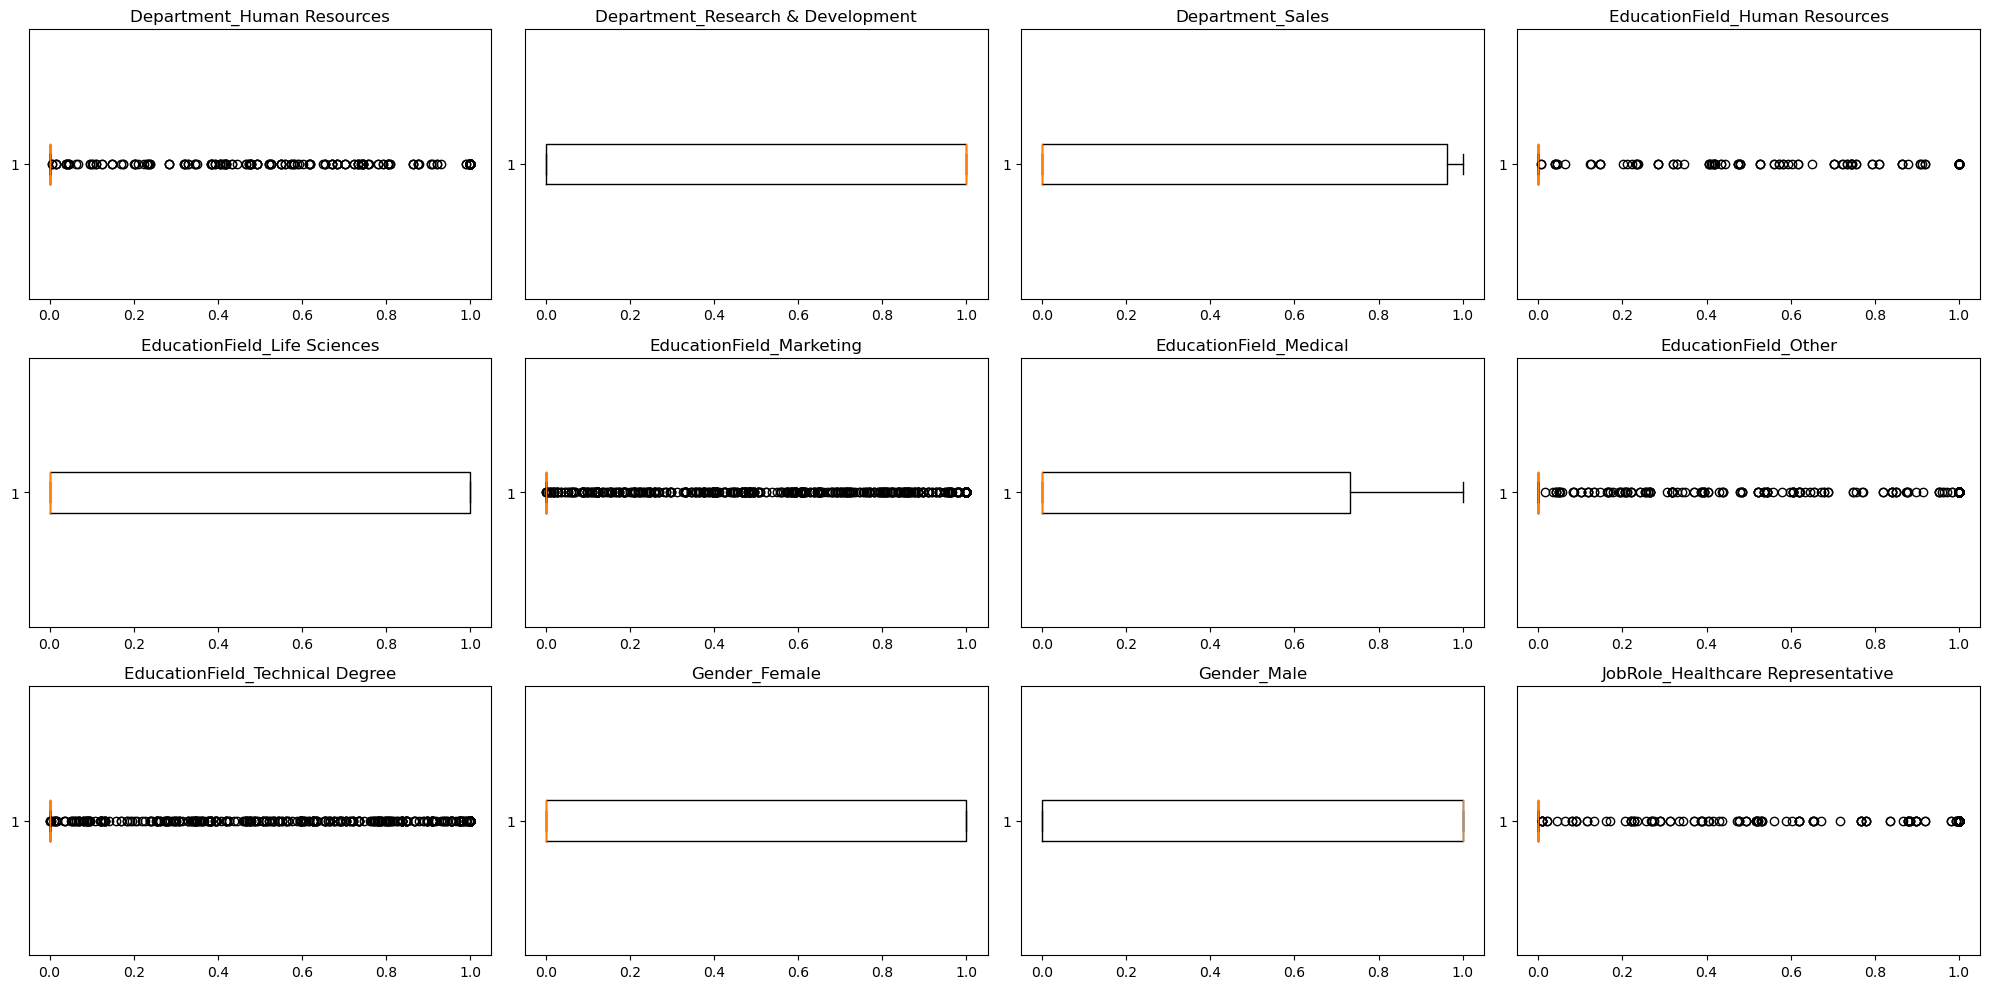

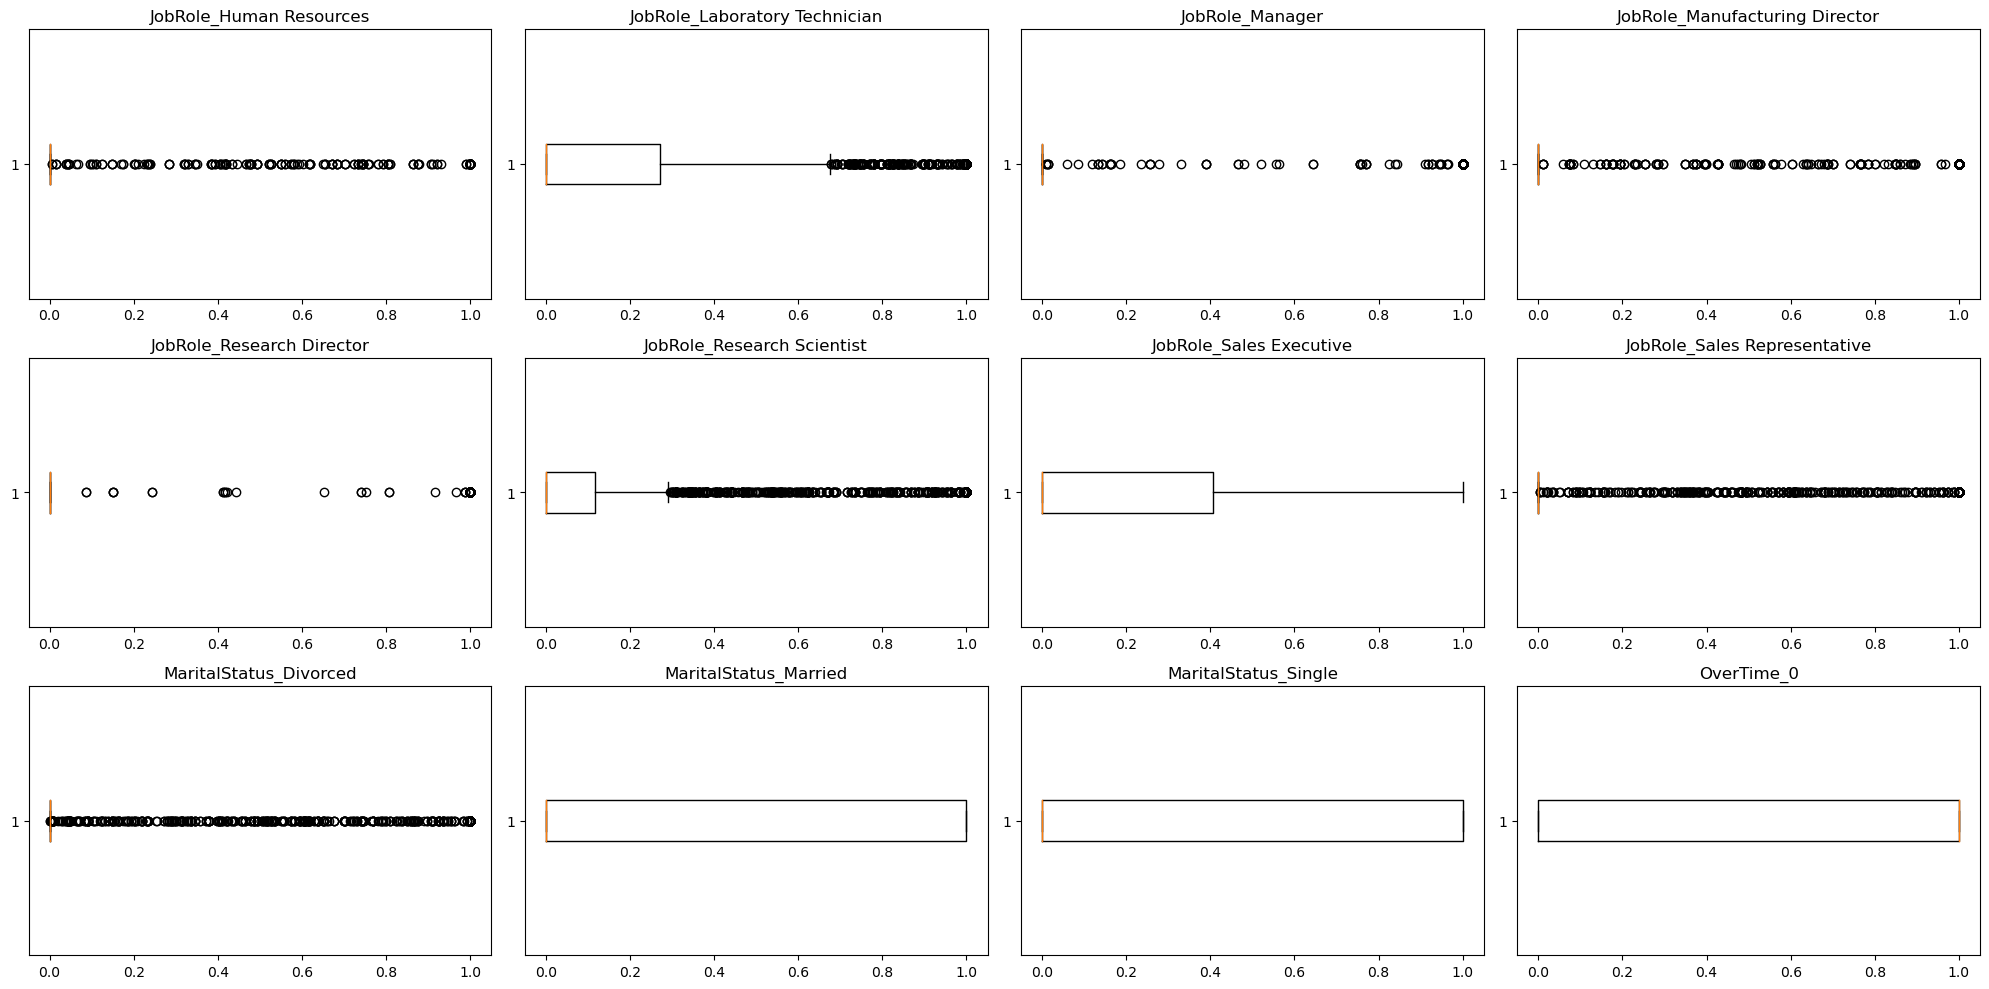

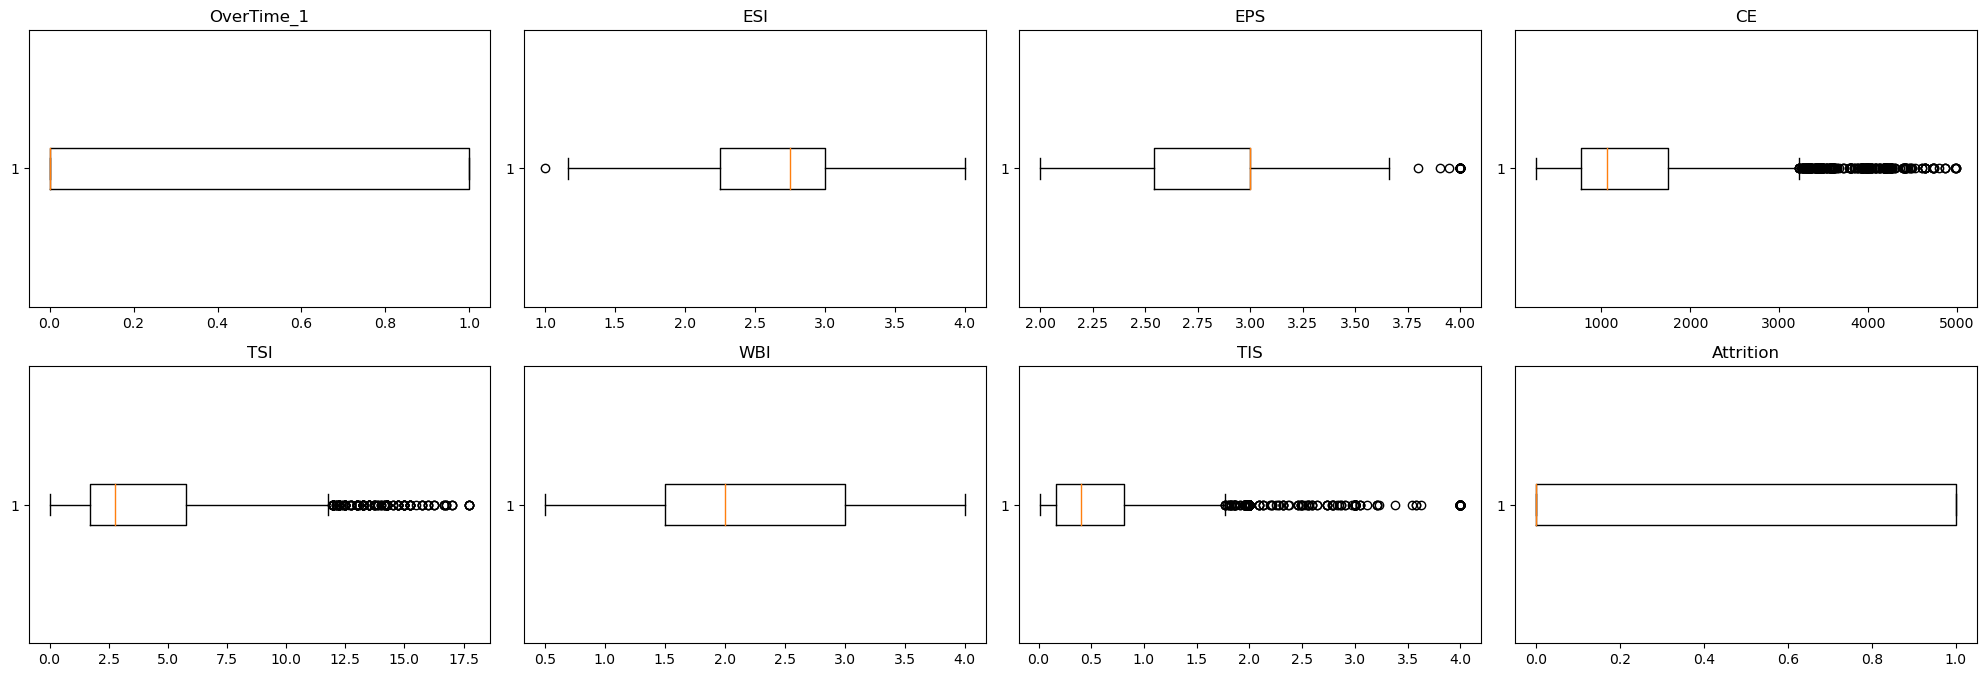

In [18]:
# Plot boxplots for all numerical columns to visualize outliers
batch_size = 12  # Number of columns to plot in each batch
num_columns = len(numerical_columns)
rows = (num_columns // 4) + 1  # Create enough rows to fit all columns

def plot_batch(start, end):
    plt.figure(figsize=(20, 10))
    for i, column in enumerate(numerical_columns[start:end], 1):
        plt.subplot(3, 4, i)  # Create subplots in a 3x4 grid
        plt.boxplot(resampled_increased_df[column].dropna(), vert=False)
        plt.title(column)
    plt.tight_layout()
    plt.show()

# Plot the batches
for i in range(0, num_columns, batch_size):
    plot_batch(i, min(i + batch_size, num_columns))

# TRAINING THE MODEL WITH STACKING APPROACH: WITHOUT K-FOLD CROSS VALIDATION

In [19]:
# Prediction without k-fold cross validation
# Load your data
# Assuming df is your DataFrame with the target column named 'target'
X = resampled_increased_df.drop('Attrition', axis=1)  # Adjust column name as per your DataFrame
y = resampled_increased_df['Attrition']  # Adjust the target column name

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Define the meta model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_classifier.predict(X_test)
y_pred_proba = stacking_classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9744444444444444
Confusion Matrix:
 [[438   7]
 [ 16 439]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       445
           1       0.98      0.96      0.97       455

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900

ROC-AUC: 0.9745524138782566
F1 Score: 0.974472807991121


# VISUALIZATION: RESULTS OF STACKING APPROACH WITHOUT K-FOLD CROSS VALIDATION

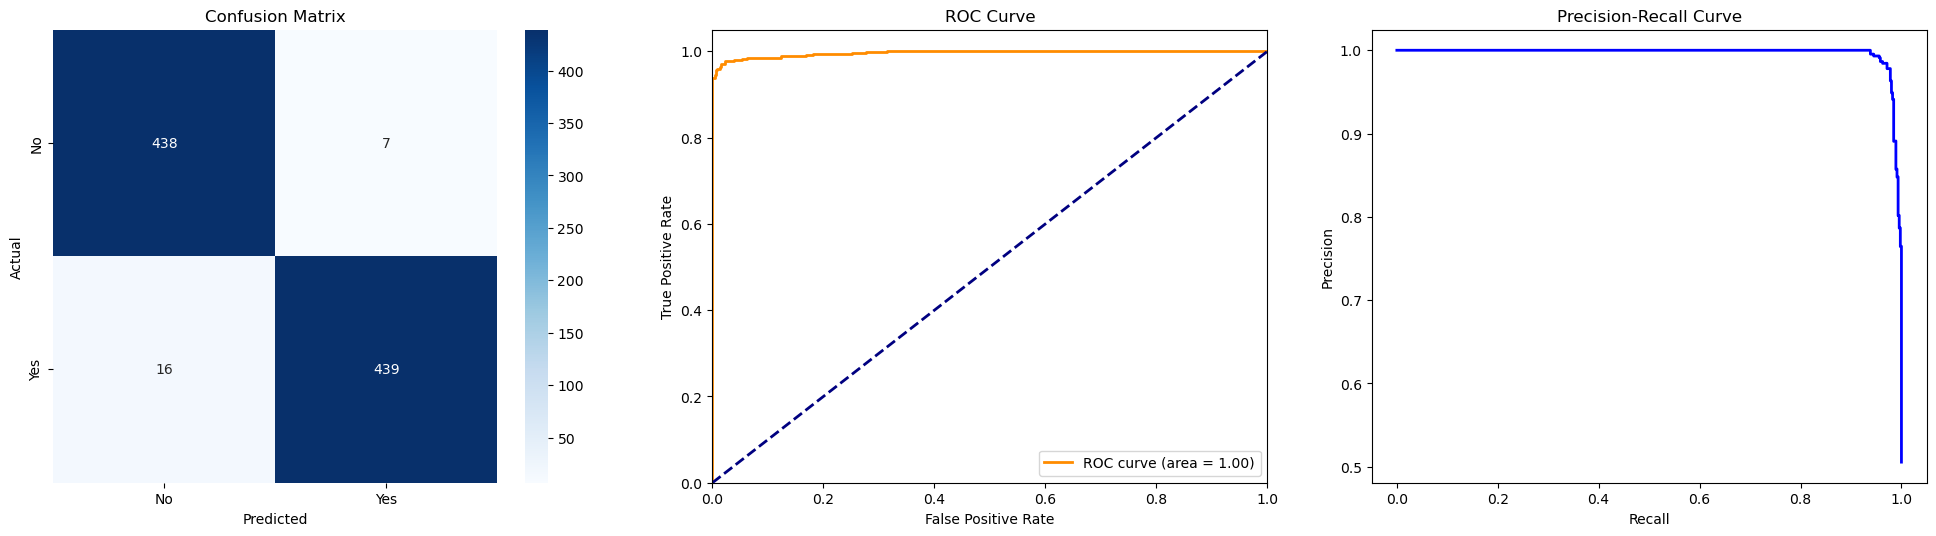

In [20]:
#Plotted the diagrams
# Initialize the figure
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot the ROC curve and calculate the AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

# Plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

axes[2].plot(recall, precision, color='blue', lw=2)
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

# TRAINING THE MODEL WITH STACKING APPROACH: WITH K-FOLD CROSS VALIDATION

In [21]:
# Prediction with K-Fold cross validation with augmented data
# Assuming 'resampled_increased_df' and the target column name 'Attrition' are correctly set
X = resampled_increased_df.drop('Attrition', axis=1)
y = resampled_increased_df['Attrition']

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Define the meta model
meta_model = LogisticRegression()

# Create the stacking classifier with 10-fold CV for the meta-model training
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=10)

# Perform 10-fold cross-validation across the whole dataset for accuracy
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_cv_scores1 = cross_val_score(stacking_classifier, X, y, cv=kf, scoring='accuracy')

# Perform 10-fold cross-validation across the whole dataset for F1 score
f1_cv_scores = cross_val_score(stacking_classifier, X, y, cv=kf, scoring=make_scorer(f1_score, average='weighted'))

# Print cross-validation results for accuracy
print("10-Fold CV Accuracy Scores:", accuracy_cv_scores1)
print("Mean CV Accuracy:", accuracy_cv_scores1.mean())
print("Standard Deviation in CV Accuracy:", accuracy_cv_scores1.std())

# Print cross-validation results for F1 score
print("10-Fold CV F1 Scores:", f1_cv_scores)
print("Mean CV F1 Score:", f1_cv_scores.mean())
print("Standard Deviation in CV F1 Score:", f1_cv_scores.std())

# Split the data for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = stacking_classifier.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

10-Fold CV Accuracy Scores: [0.98       0.97111111 0.98444444 0.97333333 0.98666667 0.99333333
 0.96666667 0.98666667 0.97333333 0.9844098 ]
Mean CV Accuracy: 0.9799965355110121
Standard Deviation in CV Accuracy: 0.008071833605301245
10-Fold CV F1 Scores: [0.9799997  0.97110184 0.98444637 0.9733254  0.98666825 0.99333224
 0.96663311 0.98666667 0.97328024 0.98441182]
Mean CV F1 Score: 0.979986563078216
Standard Deviation in CV F1 Score: 0.008083611062744434
Confusion Matrix:
 [[438   7]
 [ 17 438]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       445
           1       0.98      0.96      0.97       455

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



# TRAINING THE MODEL WITH STACKING APPROACH: ORGINAL IMBALANCED DATASET

In [22]:
# Cross Validation done on imbalanced data, original dataset

# Assuming 'attrition_data_processed_df' is correctly set
X = attrition_data_processed_df.drop('Attrition', axis=1)
y = attrition_data_processed_df['Attrition']

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Define the meta model
meta_model = LogisticRegression()

# Create the stacking classifier with 10-fold CV for the meta-model training
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=10)

# Perform 10-fold cross-validation across the whole dataset for accuracy
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_cv_scores2 = cross_val_score(stacking_classifier, X, y, cv=kf, scoring='accuracy')

# Perform 10-fold cross-validation across the whole dataset for F1 score
f1_cv_scores = cross_val_score(stacking_classifier, X, y, cv=kf, scoring=make_scorer(f1_score, average='weighted'))

# Print cross-validation results for accuracy
print("10-Fold CV Accuracy Scores:", accuracy_cv_scores2)
print("Mean CV Accuracy:", accuracy_cv_scores2.mean())
print("Standard Deviation in CV Accuracy:", accuracy_cv_scores2.std())

# Print cross-validation results for F1 score
print("10-Fold CV F1 Scores:", f1_cv_scores)
print("Mean CV F1 Score:", f1_cv_scores.mean())
print("Standard Deviation in CV F1 Score:", f1_cv_scores.std())

# Split the data for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = stacking_classifier.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

10-Fold CV Accuracy Scores: [0.88435374 0.88435374 0.86394558 0.91836735 0.9047619  0.88435374
 0.85034014 0.88435374 0.86394558 0.86394558]
Mean CV Accuracy: 0.8802721088435375
Standard Deviation in CV Accuracy: 0.01952748312164264
10-Fold CV F1 Scores: [0.86863657 0.86364762 0.82916475 0.90940957 0.90098262 0.86986715
 0.82196958 0.86702846 0.84467279 0.84388559]
Mean CV F1 Score: 0.8619264686782977
Standard Deviation in CV F1 Score: 0.026851715197454103

Confusion Matrix:
 [[244  11]
 [ 29  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       255
           1       0.48      0.26      0.33        39

    accuracy                           0.86       294
   macro avg       0.68      0.61      0.63       294
weighted avg       0.84      0.86      0.85       294



# TRAINING THE MODEL WITH STACKING APPROACH: MINORITY CLASS IS BALANCED NOT INCREASED TO 4500 ROWS

In [23]:
# Cross Validation done on data when the minority class is balanced in the dataset

# Split the data into features and target
X = resampled_df.drop('Attrition', axis=1)
y = resampled_df['Attrition']

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Define the meta model
meta_model = LogisticRegression()

# Create the stacking classifier with 10-fold CV for the meta-model training
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=10)

# Perform 10-fold cross-validation across the whole dataset for accuracy
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_cv_scores3 = cross_val_score(stacking_classifier, X, y, cv=kf, scoring='accuracy')

# Perform 10-fold cross-validation across the whole dataset for F1 score
f1_cv_scores = cross_val_score(stacking_classifier, X, y, cv=kf, scoring=make_scorer(f1_score, average='weighted'))

# Print cross-validation results for accuracy
print("10-Fold CV Accuracy Scores:", accuracy_cv_scores3)
print("Mean CV Accuracy:", accuracy_cv_scores3.mean())
print("Standard Deviation in CV Accuracy:", accuracy_cv_scores3.std())

# Print cross-validation results for F1 score
print("10-Fold CV F1 Scores:", f1_cv_scores)
print("Mean CV F1 Score:", f1_cv_scores.mean())
print("Standard Deviation in CV F1 Score:", f1_cv_scores.std())

# Split the data for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = stacking_classifier.predict(X_test)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

10-Fold CV Accuracy Scores: [0.951417   0.91093117 0.93117409 0.93927126 0.92307692 0.91056911
 0.95528455 0.90243902 0.93089431 0.91463415]
Mean CV Accuracy: 0.9269691583555512
Standard Deviation in CV Accuracy: 0.016967901204548226
10-Fold CV F1 Scores: [0.95143932 0.91092241 0.93103119 0.93918655 0.92303152 0.91059278
 0.95518569 0.90246485 0.93093429 0.91491631]
Mean CV F1 Score: 0.926970490728869
Standard Deviation in CV F1 Score: 0.01692149460674238
Confusion Matrix:
 [[225  16]
 [ 24 228]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       241
           1       0.93      0.90      0.92       252

    accuracy                           0.92       493
   macro avg       0.92      0.92      0.92       493
weighted avg       0.92      0.92      0.92       493



# COMPARISON OF RESULTS OF TRAINING WITH ORGINAL DATA, BALANCED AUGMENTED DATA AND DATA INCREASED TO 4500 ROWS

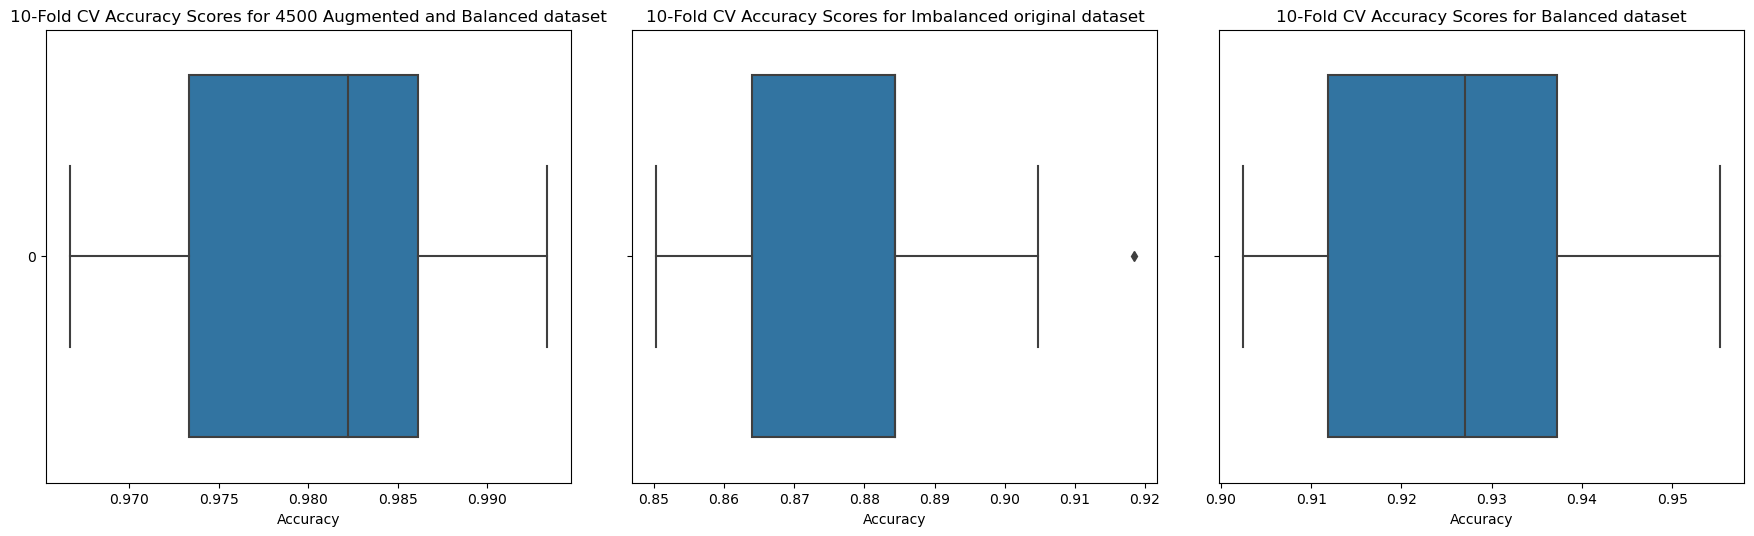

In [24]:
# Create a figure with three subplots of cross fold in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot the first box plot
sns.boxplot(data=accuracy_cv_scores1, orient='h', ax=axes[0])
axes[0].set_title('10-Fold CV Accuracy Scores for 4500 Augmented and Balanced dataset')
axes[0].set_xlabel('Accuracy')

# Plot the second box plot
sns.boxplot(data=accuracy_cv_scores2, orient='h', ax=axes[1])
axes[1].set_title('10-Fold CV Accuracy Scores for Imbalanced original dataset')
axes[1].set_xlabel('Accuracy')

# Plot the third box plot
sns.boxplot(data=accuracy_cv_scores3, orient='h', ax=axes[2])
axes[2].set_title('10-Fold CV Accuracy Scores for Balanced dataset')
axes[2].set_xlabel('Accuracy')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()